In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import precision_recall_fscore_support
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Decision Tree

In [2]:
games = pd.read_csv('datasets/games-prediction-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,False,False,False,True,False
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,False,False,True,False,False
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,False,False,True,False,False
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,False,False,True,False,False
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,False,False,True,False,False


In [3]:
table = pd.DataFrame(index = ['recall', 'precision', 'accuracy', 'fscore'], 
                     columns = ['original', 'oversampled', 'balanced_sampled'])

[Text(0.7640324519230769, 0.9545454545454546, 'genre_Massively Multiplayer <= 0.5\ngini = 0.456\nsamples = 8134\nvalue = [2856, 5278]\nclass = good'),
 Text(0.5775841346153846, 0.8636363636363636, 'K_cluster_3 <= 0.5\ngini = 0.447\nsamples = 7745\nvalue = [2614, 5131]\nclass = good'),
 Text(0.3807291666666667, 0.7727272727272727, 'genre_Simulation <= 0.5\ngini = 0.46\nsamples = 6691\nvalue = [2401, 4290]\nclass = good'),
 Text(0.2299679487179487, 0.6818181818181818, 'K_cluster_0 <= 0.5\ngini = 0.447\nsamples = 4877\nvalue = [1642, 3235]\nclass = good'),
 Text(0.1371794871794872, 0.5909090909090909, 'genre_Action <= 0.5\ngini = 0.459\nsamples = 3139\nvalue = [1118, 2021]\nclass = good'),
 Text(0.07179487179487179, 0.5, 'genre_Strategy <= 0.5\ngini = 0.445\nsamples = 2093\nvalue = [698, 1395]\nclass = good'),
 Text(0.03782051282051282, 0.4090909090909091, 'genre_Racing <= 0.5\ngini = 0.428\nsamples = 1412\nvalue = [439, 973]\nclass = good'),
 Text(0.020512820512820513, 0.3181818181818182

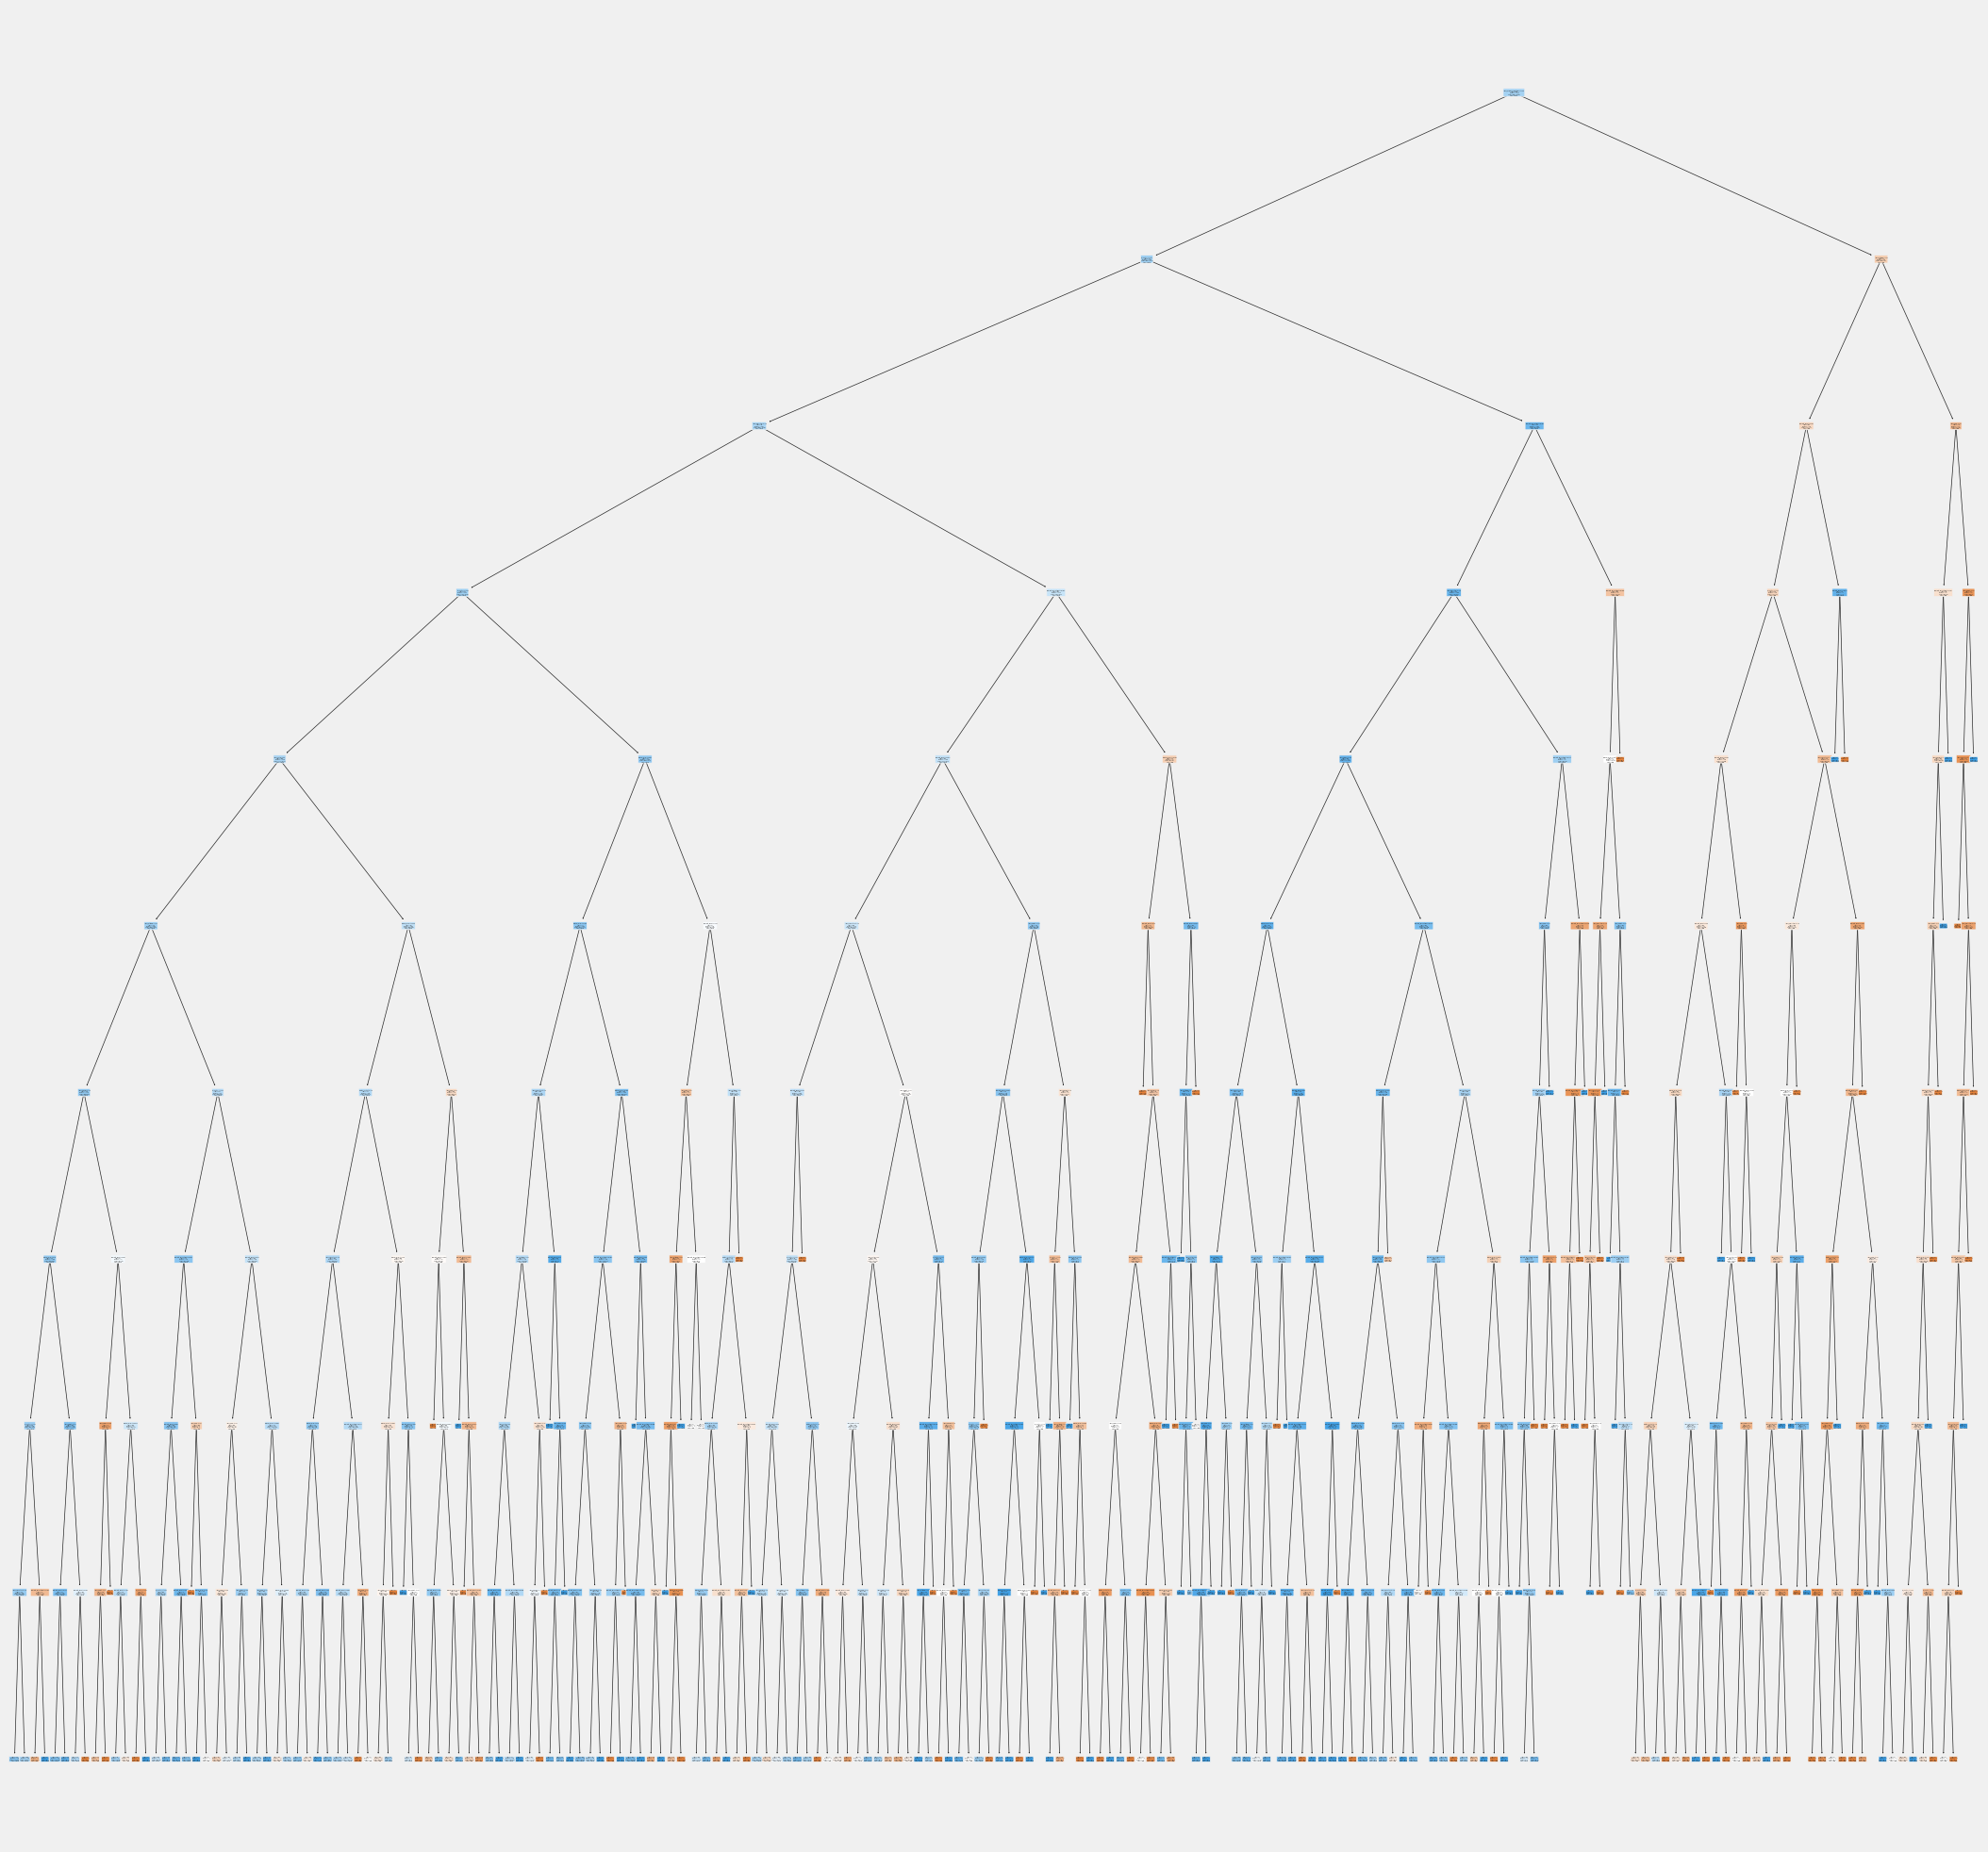

In [4]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])



Train Data
Accuracy  :	 0.7029751659700024

TPR Train :	 0.2804621848739496
TNR Train :	 0.9316028798787419

FPR Train :	 0.06839712012125805
FNR Train :	 0.7195378151260504

Precision:	 0.689328743545611
Recall:   	 0.2804621848739496
F1-score :	 0.3987058237929318


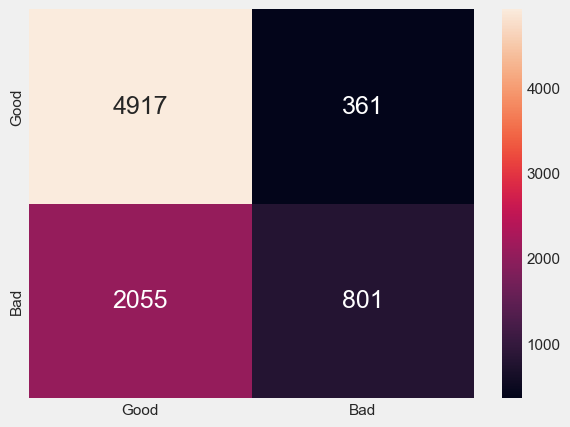

In [5]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_train, y_train_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.6480206540447504

TPR Test :	 0.21499176276771004
TNR Test :	 0.8794014084507042

FPR Test :	 0.12059859154929578
FNR Test :	 0.78500823723229

Precision:	 0.48785046728971965
Recall:   	 0.21499176276771004
F1-score :	 0.29845626072041165


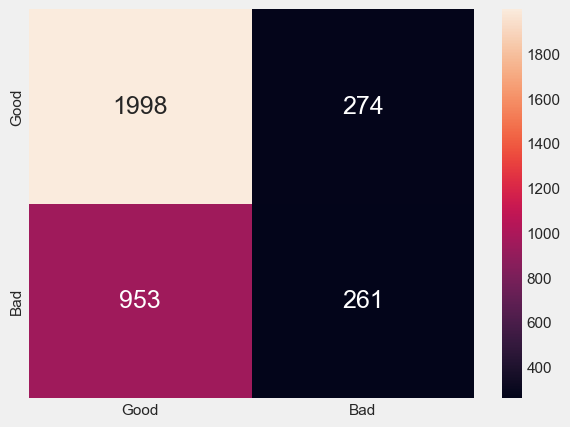

In [6]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])
table['original'] = [recall[0], precision[0], dectree.score(X_test, y_test), fscore[0]]

There is a huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. *False Positives* are much higher in number than *False Negatives* in both Train and Test data. This is a direct effect of the large `True` vs `False` class imbalance in the response variable `Recommend`. As `Recommend = True` was more likely in the data, *False Positives* are more likely too. This class imbalance is important to resolve as we do not want a biased model. Going back to our problem stated, of idenitfying good/bad games, an important part is on identifying potential bad games as to not let consumers waste money on them. Thus the predicition of bad games is important.

# Decision Tree - Oversampling

In [7]:
games = pd.read_csv('datasets/games-prediction-over-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4,recommend
0,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0,True
1,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
2,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0,True
3,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,1,0,0,False
4,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0,True


[Text(0.7399104899497487, 0.9545454545454546, 'genre_Massively Multiplayer <= 0.5\ngini = 0.495\nsamples = 9513\nvalue = [4258, 5255]\nclass = good'),
 Text(0.5339784861809045, 0.8636363636363636, 'K_cluster_3 <= 0.5\ngini = 0.49\nsamples = 8966\nvalue = [3860, 5106]\nclass = good'),
 Text(0.3629475502512563, 0.7727272727272727, 'genre_Simulation <= 0.5\ngini = 0.496\nsamples = 7889\nvalue = [3575, 4314]\nclass = good'),
 Text(0.22793655778894473, 0.6818181818181818, 'original_price <= 29.925\ngini = 0.489\nsamples = 5711\nvalue = [2439, 3272]\nclass = good'),
 Text(0.12845477386934673, 0.5909090909090909, 'discount_price <= 1.005\ngini = 0.486\nsamples = 5208\nvalue = [2176, 3032]\nclass = good'),
 Text(0.06972361809045226, 0.5, 'genre_Strategy <= 0.5\ngini = 0.497\nsamples = 1469\nvalue = [682, 787]\nclass = good'),
 Text(0.03957286432160804, 0.4090909090909091, 'discount_price <= 0.495\ngini = 0.494\nsamples = 1206\nvalue = [537, 669]\nclass = good'),
 Text(0.020100502512562814, 0.3

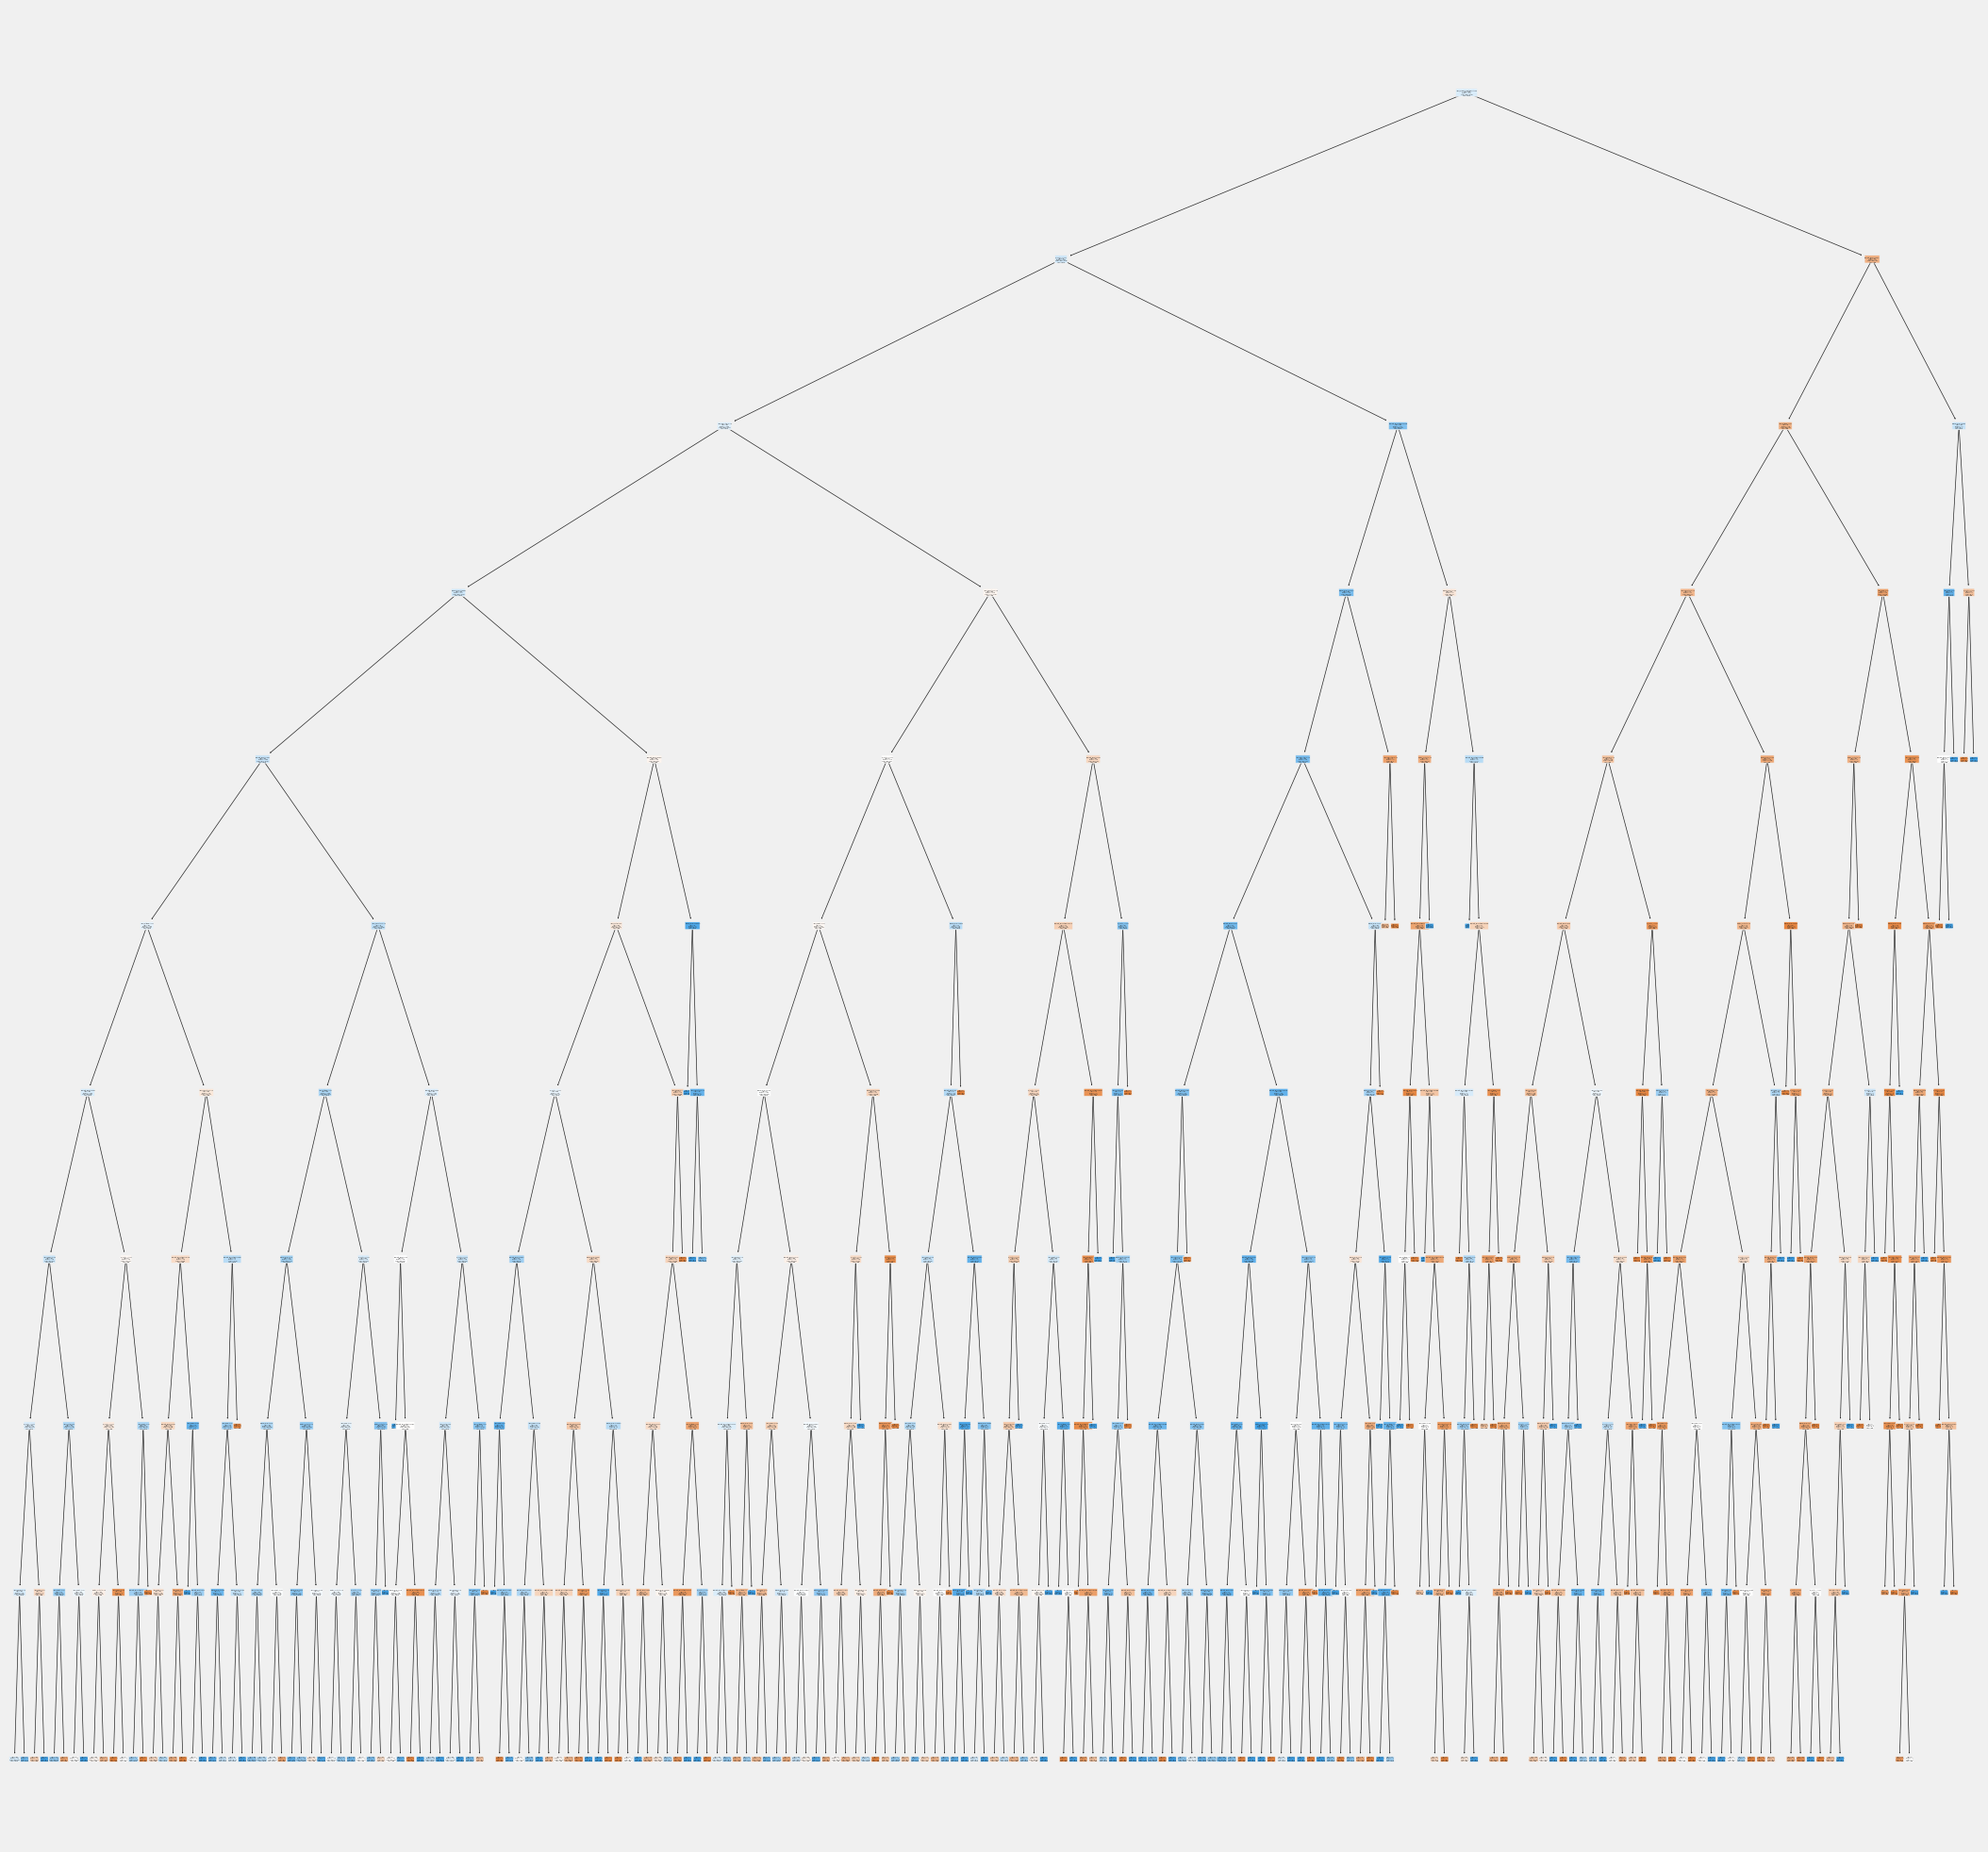

In [8]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.6507936507936508

TPR Train :	 0.5150305307656177
TNR Train :	 0.7607992388201713

FPR Train :	 0.23920076117982875
FNR Train :	 0.48496946923438233

Precision:	 0.6356521739130435
Recall:   	 0.5150305307656177
F1-score :	 0.5690192008303062


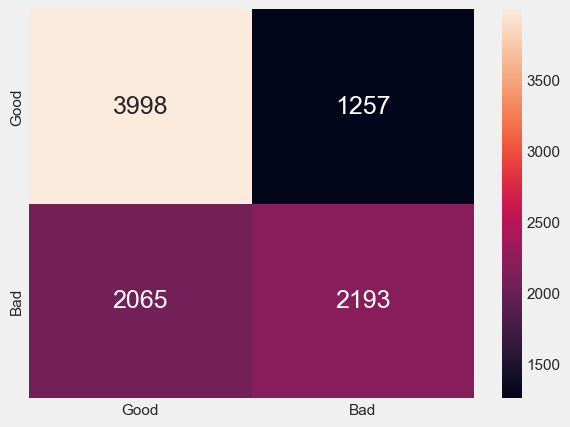

In [9]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_train, y_train_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.6070640176600441

TPR Test :	 0.45398428731762064
TNR Test :	 0.725925925925926

FPR Test :	 0.2740740740740741
FNR Test :	 0.5460157126823794

Precision:	 0.5625869262865091
Recall:   	 0.45398428731762064
F1-score :	 0.5024844720496894


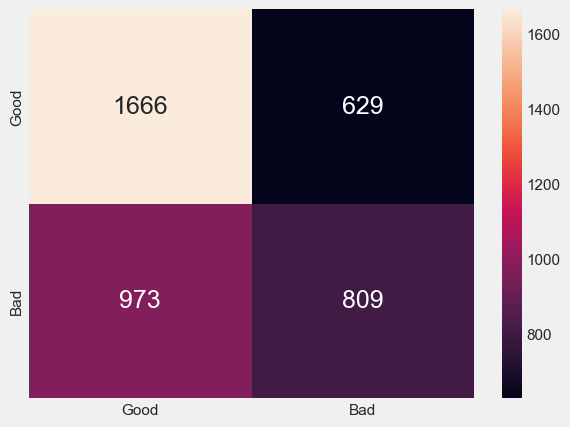

In [10]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['oversampled'] = [recall[0], precision[0], dectree.score(X_test, y_test), fscore[0]]

# Decision Tree - Balanced Sampling

In [11]:
games = pd.read_csv('datasets/games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,1,0,0
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,1,0,0
8,True,29.99,29.99,0.000000,False,0,0,0,0,0,0,0,0,1,0,0,1,0,0
10,True,19.99,19.99,0.000000,False,0,1,0,0,1,0,0,0,1,0,0,1,0,0


[Text(0.66162109375, 0.9545454545454546, 'K_cluster_3 <= 0.5\ngini = 0.5\nsamples = 10570\nvalue = [5214, 5356]\nclass = good'),
 Text(0.46798573369565216, 0.8636363636363636, 'genre_Massively Multiplayer <= 0.5\ngini = 0.499\nsamples = 9358\nvalue = [4854, 4504]\nclass = bad'),
 Text(0.33950407608695654, 0.7727272727272727, 'genre_Simulation <= 0.5\ngini = 0.5\nsamples = 8720\nvalue = [4363, 4357]\nclass = bad'),
 Text(0.20134171195652173, 0.6818181818181818, 'K_cluster_0 <= 0.5\ngini = 0.499\nsamples = 6245\nvalue = [2956, 3289]\nclass = good'),
 Text(0.12109375, 0.5909090909090909, 'original_price <= 262.18\ngini = 0.5\nsamples = 4115\nvalue = [2026, 2089]\nclass = good'),
 Text(0.08050271739130435, 0.5, 'original_price <= 29.985\ngini = 0.5\nsamples = 4047\nvalue = [2010, 2037]\nclass = good'),
 Text(0.043478260869565216, 0.4090909090909091, 'discount_price <= 8.975\ngini = 0.5\nsamples = 3704\nvalue = [1799, 1905]\nclass = good'),
 Text(0.021739130434782608, 0.3181818181818182, 'g

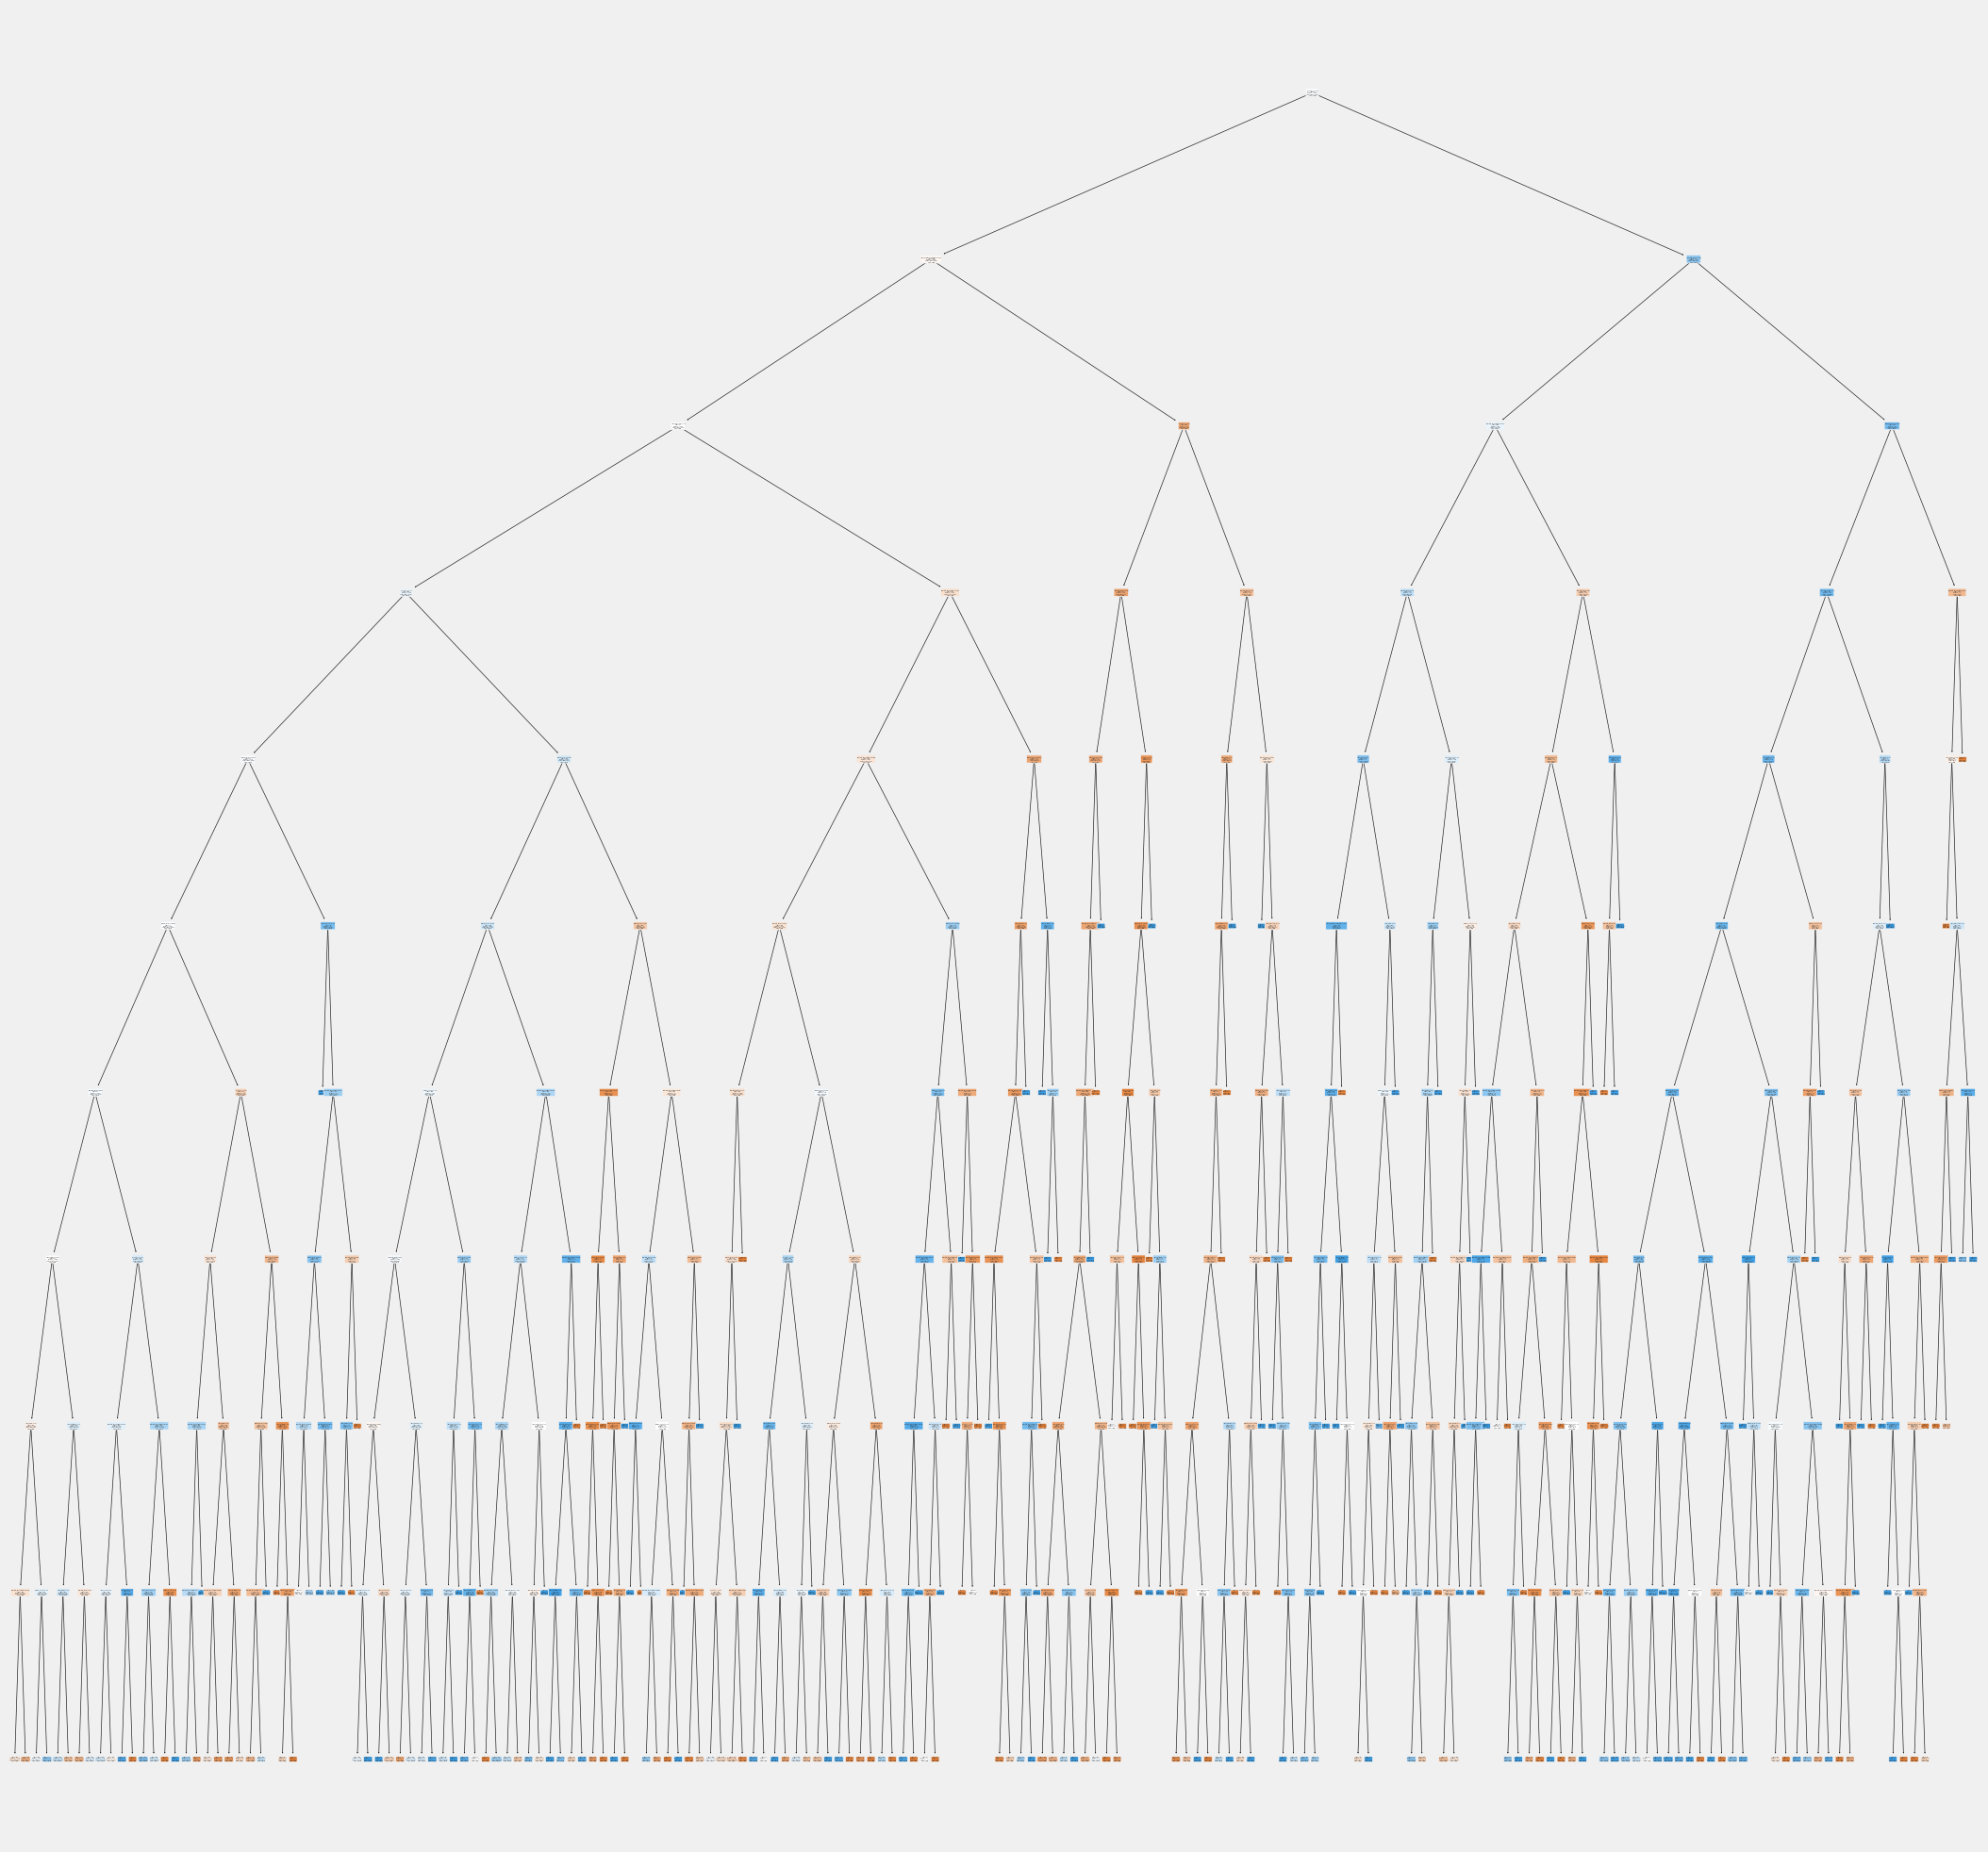

In [12]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.6441816461684011

TPR Train :	 0.6286919831223629
TNR Train :	 0.659260642270351

FPR Train :	 0.340739357729649
FNR Train :	 0.37130801687763715

Precision:	 0.6423672349598275
Recall:   	 0.6286919831223629
F1-score :	 0.6354560434234758


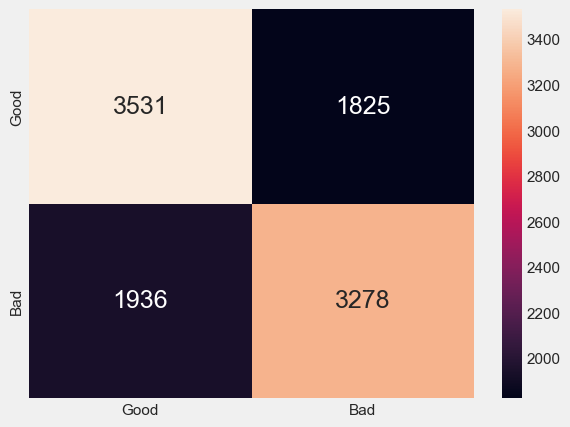

In [13]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_train, y_train_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Train :\t", (fpTest/(fpTest + tnTest)))
print("FNR Train :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_train, y_train_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

Test Data
Accuracy  :	 0.5969094922737307

TPR Test :	 0.5847602739726028
TNR Test :	 0.609845031905196

FPR Test :	 0.390154968094804
FNR Test :	 0.4152397260273973

Precision:	 0.6147614761476148
Recall:   	 0.5847602739726028
F1-score :	 0.5993856954804739


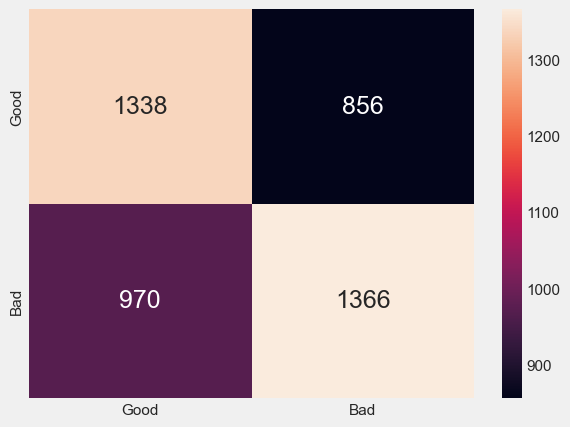

In [14]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[0][0] # True Positives : Bad (0) predicted Bad (0)
fpTest = cmTest[1][0] # False Positives : Good (1) predicted Bad (0)
tnTest = cmTest[1][1] # True Negatives : Good (1) predicted Good (1)
fnTest = cmTest[0][1] # False Negatives : Bad (0) predicted Good (1)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred, labels=[True, False]), 
           annot=True, fmt=".0f", annot_kws={"size": 18},
           xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred, labels=[False])

# Print the metrics
print()
print("Precision:\t", precision[0])
print("\033[1mRecall:\033[0m   \t", recall[0])
print("F1-score :\t", fscore[0])

table['balanced_sampled'] = [recall[0], precision[0], dectree.score(X_test, y_test), fscore[0]]


### Overview Visualization of Results

In [15]:
table

,original,oversampled,balanced_sampled
recall,0.214992,0.453984,0.584760
precision,0.487850,0.562587,0.614761
accuracy,0.648021,0.607064,0.596909
fscore,0.298456,0.502484,0.599386


In [16]:
def draw_figure(table, row, title):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.ylim([0,0.8])
    splot = sb.barplot(x = ['original','oversampled','balanced_sampled'],y = table.iloc[row,:])
    for p in splot.patches:
        if p.get_height() == 0:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')
        else:
            splot.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, -12), 
                           textcoords = 'offset points')

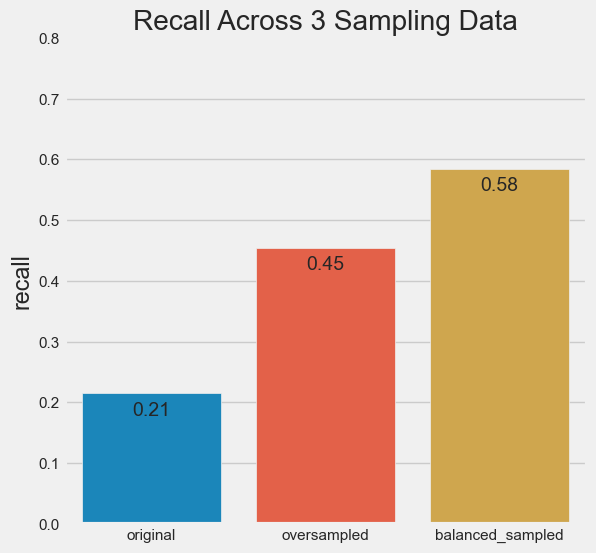

In [17]:
draw_figure(table,0,"Recall Across 3 Sampling Data")

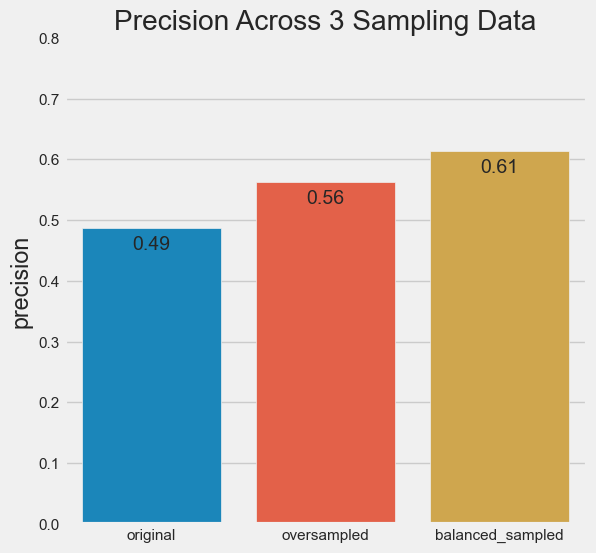

In [18]:
draw_figure(table,1,"Precision Across 3 Sampling Data")

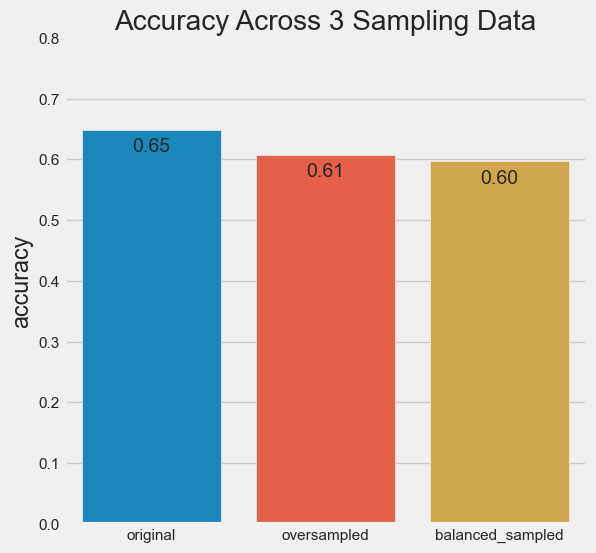

In [19]:
draw_figure(table,2,"Accuracy Across 3 Sampling Data")

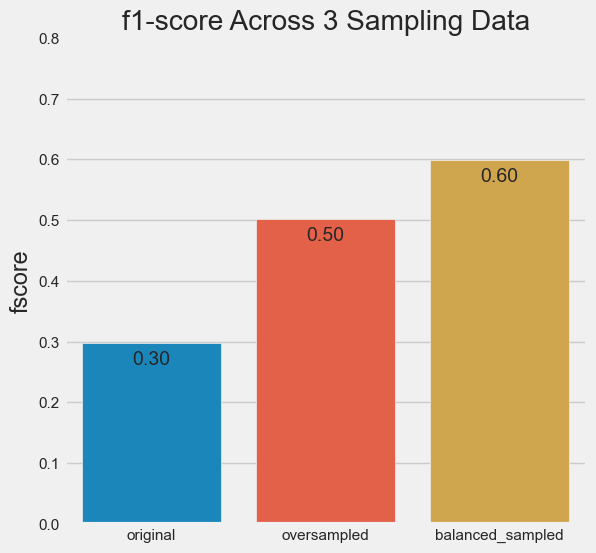

In [20]:
draw_figure(table,3,"f1-score Across 3 Sampling Data")